**INFLUENCE OF EMPLOYMENT ON PRICE OF HOUSES**

Authored By: Dhruvil Mehta Duration: 60 mins Level: Intermediate Pre-requisite skills: Python, Pandas, Matplotlib

**USE CASE SCENARIO** The main goal of this week's project is to look at the relationship between employment statistics (especially in the insurance and financial services industry) and median home prices. It uses clustering analysis to find patterns in the data, like which places may have similar housing prices and job trends. This information can help businesses, real estate investors, and policymakers make choices based on data.

**Scenario Overview**:
- A government agency is interested in understanding how employment in financial and insurance services impacts housing markets.
- The agency wants to identify clusters of similar suburbs or regions to guide housing development plans, investment policies, and workforce planning.

**What This Use Case Teaches Us**

This use case serves as an educational exercise to develop the following skills:
1. Data Cleaning and Preprocessing:
- Learn to handle datasets containing both numeric and categorical values.
- Select only the relevant numeric columns for specific analyses like correlation or clustering.
  
2. Exploratory Data Analysis (EDA):
- Understand relationships between variables using correlation analysis and visualizations like heatmaps.
  
3. Clustering Techniques:
- Apply unsupervised machine learning (KMeans clustering) to group similar data points.
- Visualize clusters to interpret patterns in the data.
  
4. Insights and Decision Making:
- Use statistical insights (e.g., cluster summaries) to guide real-world decision-making in urban planning, finance, and real estate.

**Project Goals**

The primary goals of this week’s project include:
1. Analyze Relationships:
- Explore the correlation between employment data and housing prices to uncover significant relationships.
  
2. Cluster Similar Regions:
- Identify groups of regions or suburbs with similar employment and housing trends using clustering.
  
3. Visualize Insights:
- Create meaningful visualizations (heatmaps, scatterplots, bar charts) to convey insights effectively.
  
4. Improve Analysis Workflow:
- Save and document the dataset with cluster labels for further use in upcoming analyses.

**Project Outcomes**

By completing this project, we aim to achieve:
1. Identifying Significant Correlations:
- Understand how employment in financial and insurance services correlates with median house prices.
  
2. Cluster Discovery:
- Identify and analyze three distinct clusters that summarize the relationship between employment and housing prices.
  
3. Strategic Recommendations:
- Provide actionable insights for urban developers, government policymakers, and investors based on data patterns.
  
4. Enhanced Analytical Skills:
- Gain practical experience in using Python libraries for data analysis, visualization, and machine learning.

**INITIALIZATION**

Merged Data:
   Census year  Block ID CLUE small area  Accommodation and Food Services  \
0         2018      2501      kensington                              0.0   
1         2018      2501      kensington                              0.0   
2         2018      2501      kensington                              0.0   
3         2018      2501      kensington                              0.0   
4         2018      2501      kensington                              0.0   

   Administrative and Support Services  Agriculture, Forestry and Fishing  \
0                                  0.0                                0.0   
1                                  0.0                                0.0   
2                                  0.0                                0.0   
3                                  0.0                                0.0   
4                                  0.0                                0.0   

   Arts and Recreation Services  Construction  Education and 

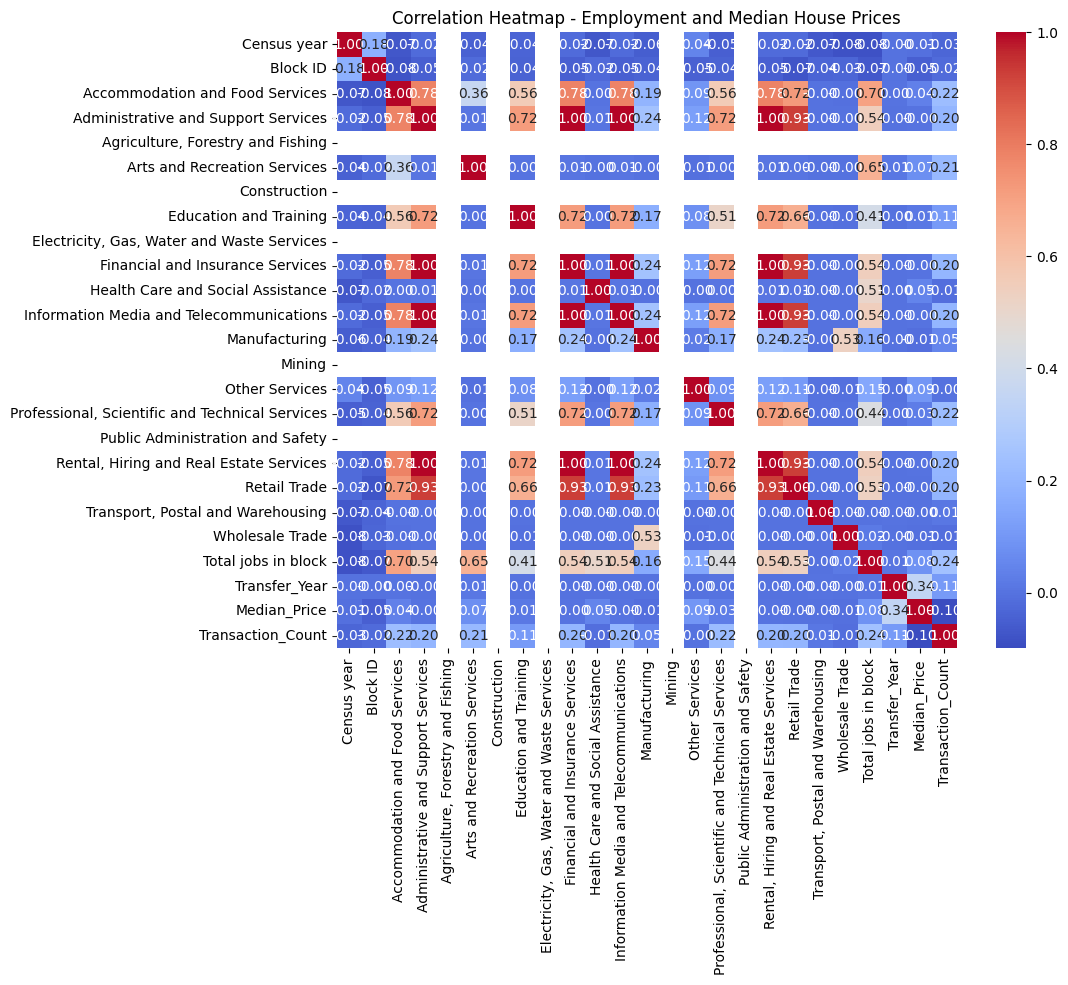

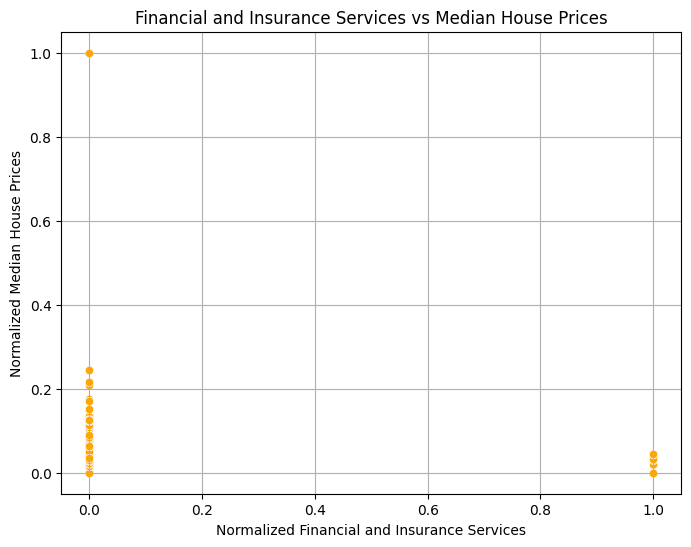

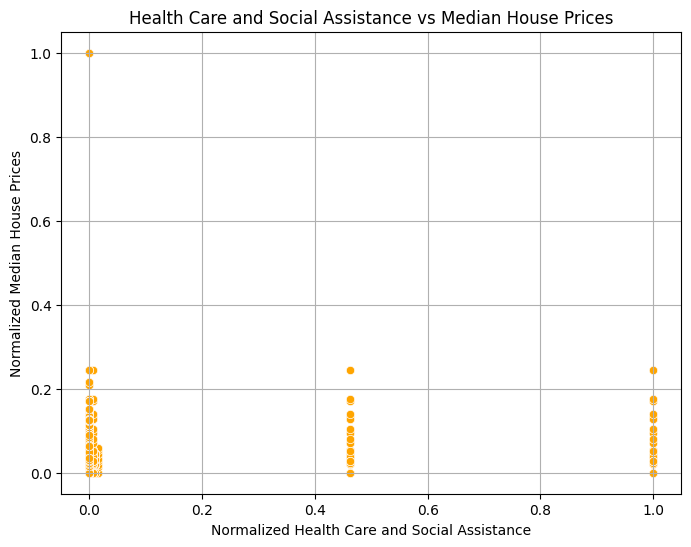

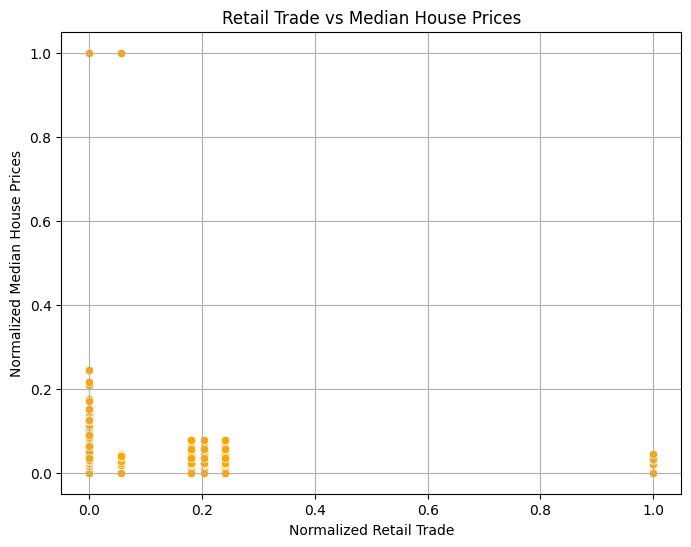

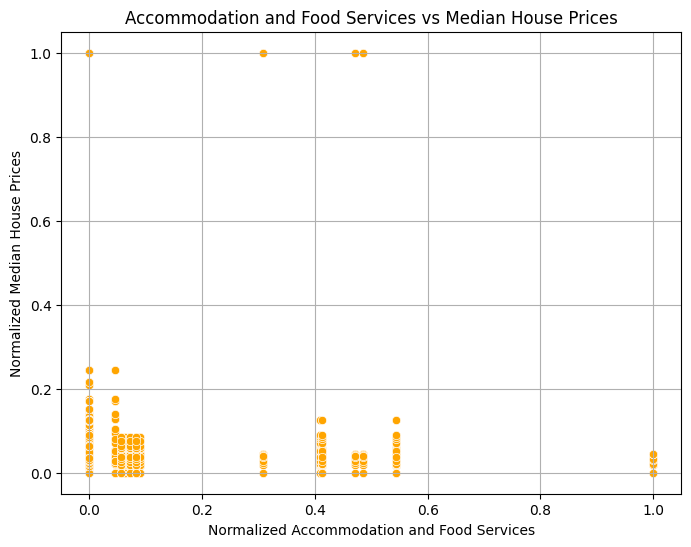


Correlation Coefficients with Median House Prices:
Financial and Insurance Services:
  Pearson Correlation: -0.00
  Spearman Correlation: 0.01
Health Care and Social Assistance:
  Pearson Correlation: 0.05
  Spearman Correlation: 0.03
Retail Trade:
  Pearson Correlation: -0.00
  Spearman Correlation: 0.00
Accommodation and Food Services:
  Pearson Correlation: 0.04
  Spearman Correlation: 0.04


C:\Users\dhruv\AppData\Local\Temp\ipykernel_28828\3563092771.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


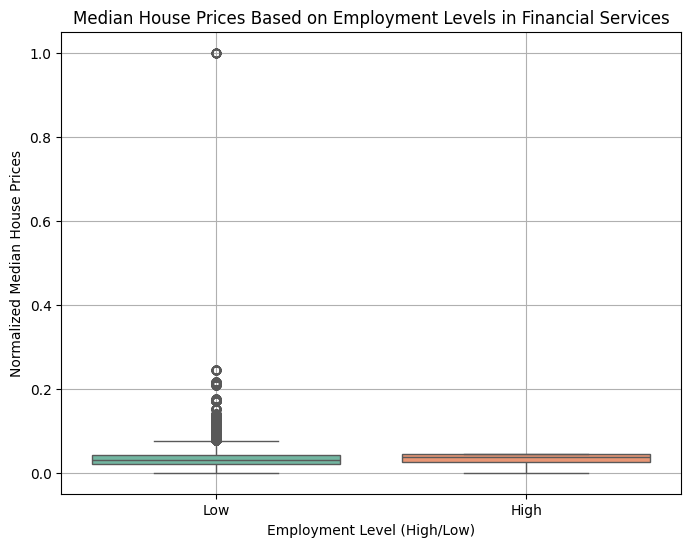

C:\Users\dhruv\AppData\Local\Temp\ipykernel_28828\3563092771.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_employment.values, y=average_employment.index, palette="viridis")


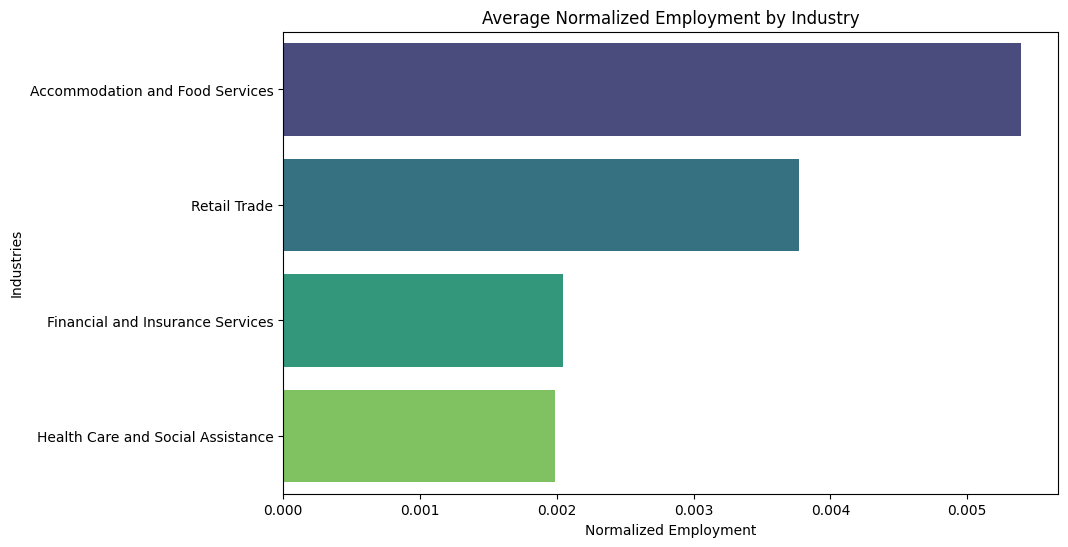

EDA results saved to 'eda_results_week3.csv'.


In [4]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Loading the cleaned dataset from Week 2
merged_data = pd.read_csv('cleaned_data.csv')

# Display the first few rows of the dataset to confirm loading
print("Merged Data:")
print(merged_data.head())

# Step 1: Correlation Analysis and Heatmap
# Filter only numeric columns for correlation computation
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = merged_data[numeric_columns].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Employment and Median House Prices")
plt.show()


# Step 2: Scatter Plots - Visualizing Correlation
industries = [
    'Financial and Insurance Services',
    'Health Care and Social Assistance',
    'Retail Trade',
    'Accommodation and Food Services'
]

for industry in industries:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=merged_data,
        x=industry,
        y='Median_Price',
        color='orange'
    )
    plt.title(f"{industry} vs Median House Prices")
    plt.xlabel(f"Normalized {industry}")
    plt.ylabel("Normalized Median House Prices")
    plt.grid(True)
    plt.show()

# Step 3: Statistical Correlation Coefficients
print("\nCorrelation Coefficients with Median House Prices:")
for industry in industries:
    pearson_corr, _ = pearsonr(merged_data[industry], merged_data['Median_Price'])
    spearman_corr, _ = spearmanr(merged_data[industry], merged_data['Median_Price'])
    print(f"{industry}:")
    print(f"  Pearson Correlation: {pearson_corr:.2f}")
    print(f"  Spearman Correlation: {spearman_corr:.2f}")

# Step 4: Trend Analysis with Boxplots
key_industry = 'Financial and Insurance Services'
threshold = merged_data[key_industry].mean()

# Creating a new column to categorize high and low employment areas
merged_data['High_Low_Employment'] = merged_data[key_industry].apply(
    lambda x: 'High' if x > threshold else 'Low'
)

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=merged_data,
    x='High_Low_Employment',
    y='Median_Price',
    palette="Set2"
)
plt.title("Median House Prices Based on Employment Levels in Financial Services")
plt.xlabel("Employment Level (High/Low)")
plt.ylabel("Normalized Median House Prices")
plt.grid(True)
plt.show()

# Step 5: Employment Trends by Industry
average_employment = merged_data[industries].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=average_employment.values, y=average_employment.index, palette="viridis")
plt.title("Average Normalized Employment by Industry")
plt.xlabel("Normalized Employment")
plt.ylabel("Industries")
plt.show()

# Step 6: Save Insights for Future Use
merged_data.to_csv('eda_results_week3.csv', index=False)
print("EDA results saved to 'eda_results_week3.csv'.")


**References**
1. https://data.melbourne.vic.gov.au/explore/dataset/employment-by-block-by-anzsic/information/
2. https://data.melbourne.vic.gov.au/explore/dataset/house-prices-by-small-area-transfer-year/information/